<a href="https://colab.research.google.com/github/tubes886/sustainable-farming/blob/main/Sustainable_Farming_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook setup

!gdown --id 1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp # sample metadata
!gdown --id 1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ # bacteria counts lognorm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

metadata = pd.read_table('sample_metadata.tsv')
metadata.index = ['farm_%i' % i for i in range(len(metadata))]

bacteria_counts_lognorm = pd.read_csv('bacteria_counts_lognorm.csv', index_col=0)


Downloading...
From: https://drive.google.com/uc?id=1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp
To: /content/sample_metadata.tsv
100% 64.3k/64.3k [00:00<00:00, 1.02MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ
To: /content/bacteria_counts_lognorm.csv
7.44MB [00:00, 28.1MB/s]


Decision tree regression model [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 


In [ ]:
# Defining X and y data
X = bacteria_counts_lognorm
y = metadata['crop_yield']

# Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initializing model
model = DecisionTreeRegressor()

# Training model with the training data
model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Making predictions on test data
preds = model.predict(X_test) 

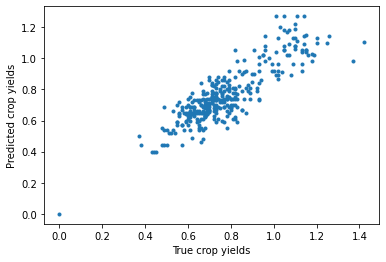

In [ ]:
# Visualizing model performance
plt.plot(y_test, preds, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

In [ ]:
# Initializing model; max_depth = number of layers, max_leaf_nodes = branches coming off
small_model = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=4)

# Training model with training data, three features
small_model.fit(X_train[['Actinocorallia', 'Clostridium sensu stricto 10', 'Blastocatellaceae']], y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=4,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Visualization
plt.figure(figsize=(20,20))
plot_tree(small_model, feature_names=['Actinocorallia', 'Clostridium sensu stricto 10', 'Blastocatellaceae'])
plt.show()

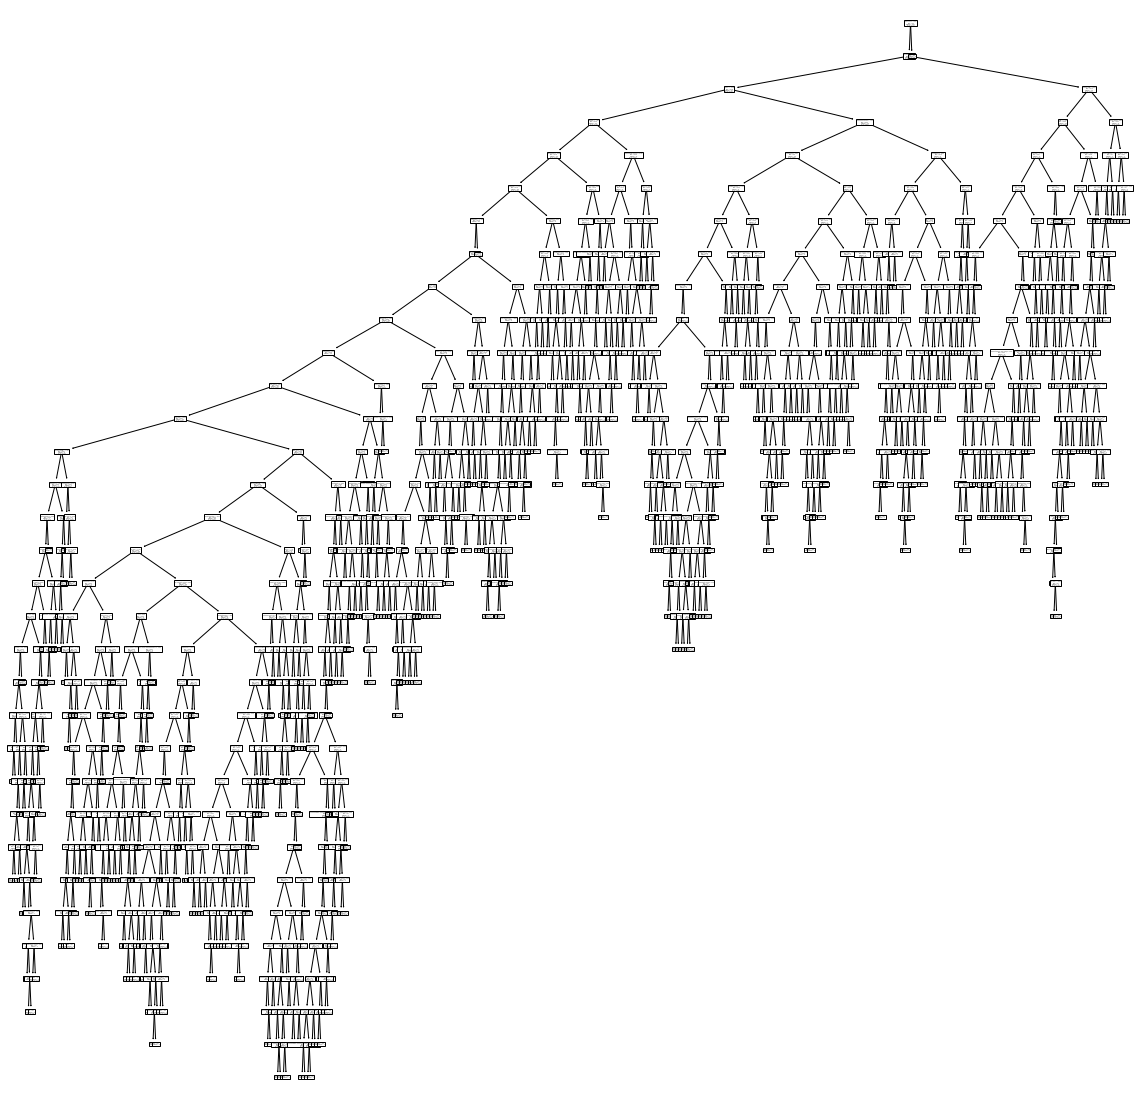

In [ ]:
# Full desicion tree model
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns)
plt.show()

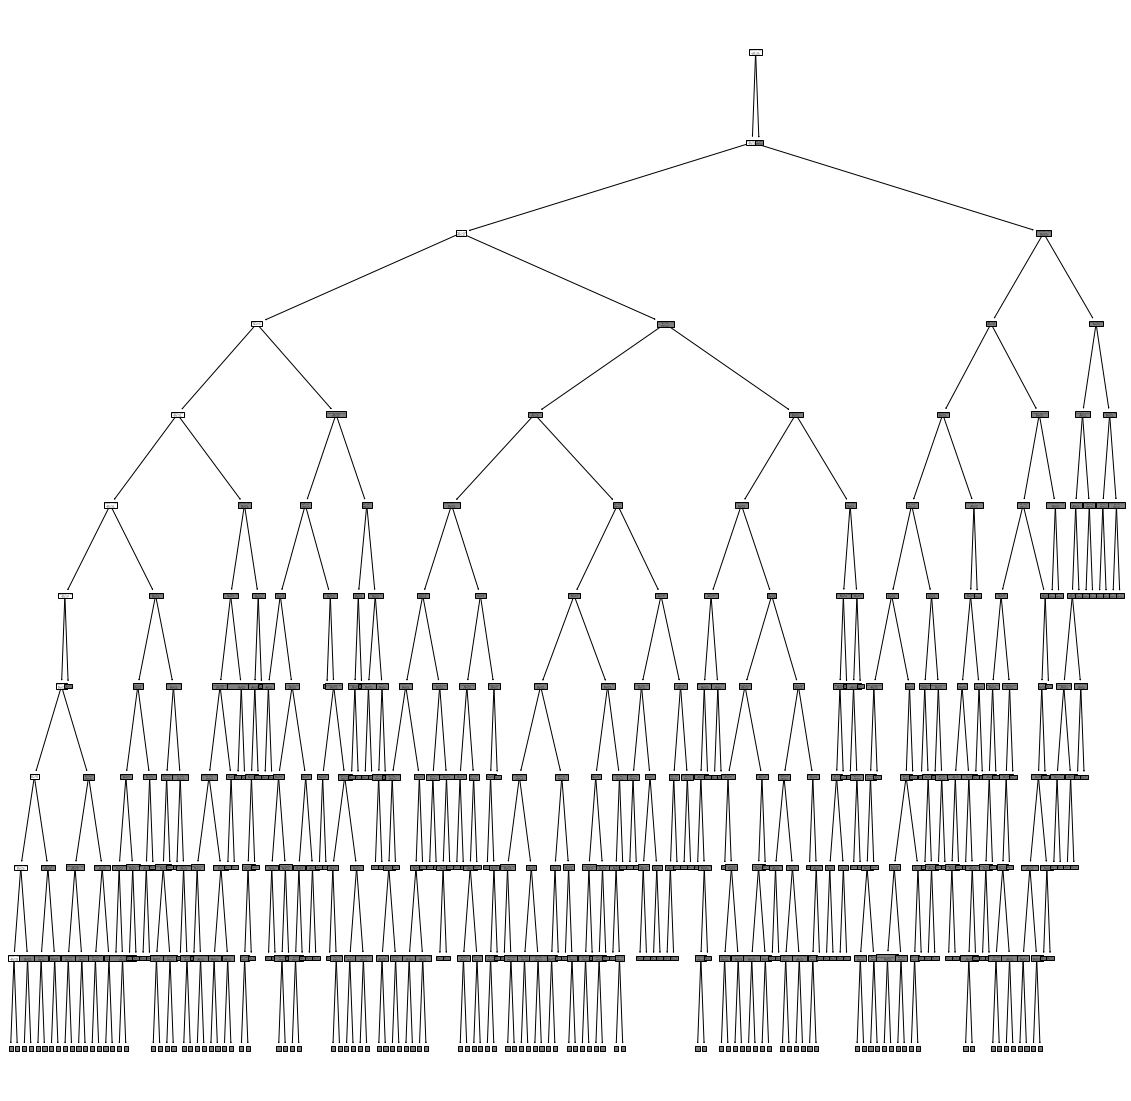

In [ ]:
# Limiting visualization to highest degree branches
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns, max_depth=10)
plt.show()

In [ ]:
# Creating feature_importance dataframe
feature_importance_dataframe = pd.DataFrame(model.feature_importances_, columns=['feature_importance'])
feature_importance_dataframe.index = X.columns
feature_importance_dataframe.head(10)

,feature_importance
Actinocorallia,0.000000
Clostridium sensu stricto 10,0.000000
Blastocatellaceae,0.000622
Saprospiraceae,0.000000
Frankiales,0.000000
Pedosphaeraceae,0.000350
possible genus 04,0.000107
S0134 terrestrial group,0.000000
Kaistia,0.000000
BIrii41,0.000030


In [ ]:
# Using the .sort_values() function to sort the rows of the dataframe
feature_importance_dataframe_sorted = feature_importance_dataframe.sort_values('feature_importance', ascending=False) ### FILL IN ###

# Using the .head() function to see the top 5 most important features
feature_importance_dataframe_sorted.head(5)

,feature_importance
Xanthomonas,0.091699
Reyranella,0.066663
TRA3-20,0.062946
Babeliales,0.059124
Bradyrhizobium,0.053281


In [ ]:
# Initializing model
model = DecisionTreeRegressor(max_depth= 100, max_leaf_nodes=200)

# Training model with training data
model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=200,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

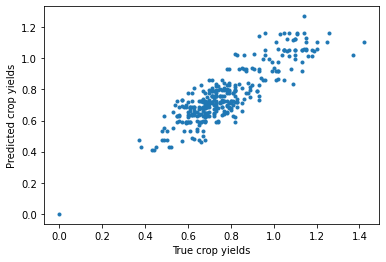

In [ ]:
# Making predictions on test data
preds = model.predict(X_test)

# Plotting predictions against true crop yields of the data
plt.plot(y_test, preds, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

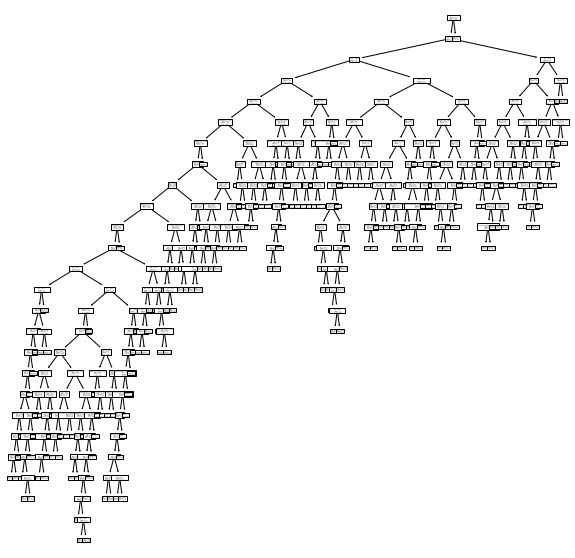

In [ ]:
# Visualizing decision tree

plt.figure(figsize=(10,10))

# Using plot_tree to visualize first few branches of decision tree
plot_tree(model, feature_names=X.columns)

plt.show()
